# Bayesian network inference

# 1 - Probabilistic inference

Probabilistic inference is one of the most fundamental mechanisms for reasoning under uncertainty. Given a BN $\mathcal{B}$ over a set of random variables $\mathbf{X}$, probabilistic inference allows us to answer general queries of the form $P(\mathbf{i}|\mathbf{e})$ where $\mathbf{e}$ are the values of the evidence variables $\mathbf{E} \subset \mathbf{X}$ and $\mathbf{i}$ are the values of the variables of interest $\mathbf{I} \subseteq \{\mathbf{X} \setminus \mathbf{E}\}$, whose values we do not know. For example, in the medical domain, we can query the probability of a certain disease given the observed symptoms. The goal of inference can be formulated as follows:

$$
\begin{equation*}
P(\mathbf{i}|\mathbf{e}) = \frac{P(\mathbf{i},\mathbf{e})}{P(\mathbf{e})} \ .
\end{equation*}
$$

The general problem of probabilistic inference in BNs was first tackled by [Kim and Pearl (1983)](https://koasas.kaist.ac.kr/bitstream/10203/17387/1/A%20Computational%20Model%20for%20Causal%20and%20Diagnostic%20Reasoning%20in%20Inference%20Systems.pdf). On a very high level, inference algorithms can be divided into two main classes: exact inference methods and approximate inference methods. We address each of these classes in the following sections. For additional information on this topic, [Salmerón et al. (2018)](https://www.jair.org/index.php/jair/article/download/11228/26433) provide a recent review of the literature.


## 1.1 - Exact inference methods

Exact inference algorithms are designed to give an exact answer to the probabilistic query. While exact methods were originally designed for categorical BNs, they can be easily adapted for linear Gaussian BNs using the canonical form representation [(Laurtizen, 1992)](https://www.jstor.org/stable/pdf/2290647.pdf). There are three main strategies of exact inference in BNs:

* **Variable elimination.** As the name suggests, the idea behind variable elimination is to successively remove variables from a BN while maintaining its ability to answer the query of interest. It was first formalized by [Zhang and Poole (1994)](https://repository.hkust.edu.hk/ir/bitstream/1783.1-757/1/canai94.pdf), although its origins go back to [Shachter et al. (1990)](https://cdn.aaai.org/AAAI/1990/AAAI90-019.pdf).

* **Junction trees.** The junction tree algorithm is a variation on the variable elimination algorithm that can be understood in terms of factor elimination. This algorithm improves on the complexity of variable elimination when answering multiple queries. There are two main approaches to the junction tree algorithm: (i) the Shenoy-Shafer architecture ([Shenoy and Shafer, 1990](https://kuscholarworks.ku.edu/bitstream/handle/1808/144/UAI90.pdf)), and (ii) the Hugin architecture [(Jensen, 1990)](https://cir.nii.ac.jp/crid/1572824499660884992). Both of them are based on the work of [Lauritzen and Spiegelhalter (1988)](https://www.jstor.org/stable/pdf/2345762.pdf), which introduced the first junction tree algorithm.

* **Conditioning.** The first incarnation of the conditioning algorithm was presented by [Pearl (1986)](https://arxiv.org/pdf/1304.3422) in the	context of cutset conditioning, where the conditioning variables cut all loops in the network, forming a polytree. The general algorithm, under the name of global conditioning, was presented by [Shachter et al. (1994)](https://arxiv.org/pdf/1302.6843), which demonstrated the relation between conditioning and variable elimination. Finally recursive conditioning was developed by [Darwiche (2001)](https://www.sciencedirect.com/science/article/pii/S0004370200000692/pdf).

----

**Note:** A polytree is a DAG whose underlying undirected graph is both connected and acyclic (i.e., a tree).

----

Although it is NP-hard to perform exact inference in general BNs ([Cooper, 1990](https://www.sciencedirect.com/science/article/pii/000437029090060D/pdf?md5=22871d7acedfc77015e8a4296cd3efbf&pid=1-s2.0-000437029090060D-main.pdf)), it becomes tractable in BNs with bounded treewidth [(Kwisthout et al., 2010)](https://ebooks.iospress.nl/pdf/doi/10.3233/978-1-60750-606-5-237). The notion of treewidth was introduced by [Robertson and Seymour (1986)](https://www.sciencedirect.com/science/article/abs/pii/0196677486900234) and can be understood as a measure of similarity between a graph and a tree (e.g., trees have a treewidth $\leq$ $1$). However, this result only applies to categorical BNs and linear Gaussian BNs. Inference in conditional linear Gaussian BNs is much harder. Even in simple models like polytrees, exact inference is NP-hard [(Lerner and Parr, 2001)](https://arxiv.org/pdf/1301.2288).


## 1.2 - Approximate inference methods

Approximate inference algorithms are designed to give an approximate answer to the probabilistic query, with the understanding that giving the exact probability is not crucial. Unfortunately, identical to the exact case, performing approximate inference has also been demonstrated to be NP-hard in general BNs ([Dagum and Luby, 1993](https://www.sciencedirect.com/science/article/pii/000437029390036B/pdf?md5=6662ccd95b0a88ff2e6f9637bfd8e083&pid=1-s2.0-000437029390036B-main.pdf); [Lerner and Parr, 2001](https://arxiv.org/pdf/1301.2288)). Despite these discouraging results, one can try to produce useful approximate algorithms with a computational performance that is in many cases far more manageable than that of exact algorithms. There are two main strategies of approximate inference in BNs:


* **Sampling.** The idea behind sampling-based algorithms is to randomly pick assignments of the random variables, called samples, and then estimate the JPD of the query. It was first introduced for inference in BNs by [Henrion (1986)](https://www.academia.edu/download/55836968/Propagating_w_Logic_Sampling._Henrion_1988.pdf), who proposed a method based on probabilistic logic sampling. Several improvements have been done since then, such as likelihood weighting ([Shachter and Peot, 1990](https://arxiv.org/pdf/1304.1526)) and Markov chain Monte Carlo ([Pearl, 1987](https://hedibert.org/wp-content/uploads/2013/12/1987Pearl.pdf); [Hrycej, 1990](https://www.sciencedirect.com/science/article/abs/pii/000437029090020Z); [York, 1992](https://www.sciencedirect.com/science/article/abs/pii/0004370292900667)).
	
* **Optimization.** The idea behind optimization-based algorithms is to construct an approximation to the target distribution, and then optimize a similarity function. This approach is usually referred to as variational inference ([Beli et al., 2016](https://arxiv.org/pdf/1601.00670)). Methods in this class fall into three main categories: belief propagation ([Pearl, 1988](https://dl.acm.org/doi/10.5555/534975); [Yedidia et al., 2000](https://proceedings.neurips.cc/paper_files/paper/2000/file/61b1fb3f59e28c67f3925f3c79be81a1-Paper.pdf)), expectation propagation ([Minka, 2001](https://arxiv.org/pdf/1301.2294)) and mean-field variational inference ([Saul et al., 1996](https://www.jair.org/index.php/jair/article/download/10156/24075)). 

----

**Note:** The mean-field approach is discussed in detail in `3_bayesian_network_learning.ipynb` since it is a central part of the Variational Bayes framework.

----

## 1.3 - Hard versus virtual evidence

**TODO**

No es lo mismo soft que virtual evidence, explicar los 3 tipos:
* hard
* virtual
* soft

Quizas virtual evidence nos permite combinar informacion que salga de diferentes modelos si estos modelos tienen una capa softmax al final

https://vannevar.ece.uw.edu/techsite/papers/documents/UWEETR-2004-0016.pdf

# 2 - PGMPy

## 2.1 - Inference in Discrete Bayesian network

In this example we are going to show how to do Exact inference in a Discrete Bayesian network. More specifically, we will be using the Asia network (http://www.bnlearn.com/bnrepository/#asia) for this example


----

**Notes:** 
* I sometimes get weird errors where it expect certain variables' evidence in integer form...
* I don't see any changes when introducing virtual evidence

----

### 2.1.1 - Define the model

In [34]:
# Fetch the asia model from the bnlearn repository

from pgmpy.utils import get_example_model

asia_model = get_example_model("asia")

### 2.1.2 - Paint the graph

List of possible layouts available in NetworkX:

* **Fruchterman-Reingold (spring):** Simulates physics-based repulsion between nodes, often leading to organic layouts (`nx.spring_layout`).
* **Spectral:** Positions nodes based on the eigenvalues and eigenvectors of the graph Laplacian (`nx.spectral_layout`).
* **Circular:** Arranges nodes in a circle, useful for cyclic structures (`nx.circular_layout`).
* **Shell:** Places nodes in concentric circles based on a hierarchy or community structure (if present) (`nx.shell_layout`).
* **Random:** Randomly scatters nodes within a defined area (`nx.random_layout`).
* **Kamada-Kawai:** Optimizes node placement to minimize the total length of edges (`nx.kamada_kawai_layout`).
* **Bipartite:** Specifically designed for bipartite graphs, placing nodes from two sets on separate sides (`nx.bipartite_layout`).
* **BFS:** Arranges nodes based on their level in a Breadth-First Search traversal (`nx.bfs_layout`).

In addition to these, NetworkX can integrate with libraries like `pygraphviz` which offer even more layout options like hierarchical (layered) or radial layouts.

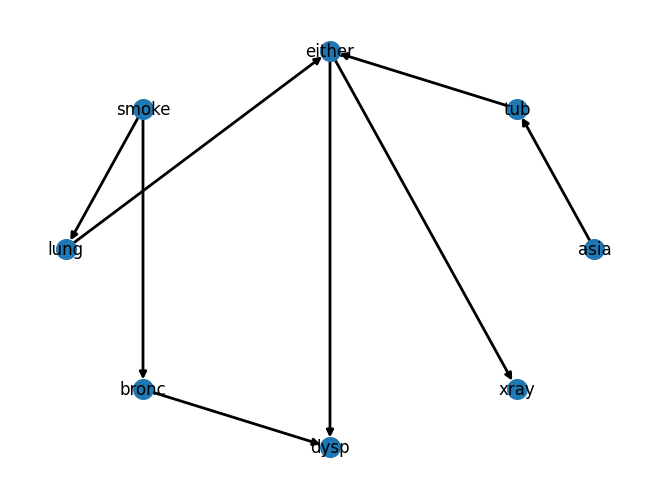

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Create NetworkX graph
G = nx.DiGraph()
G.add_edges_from(list(asia_model.edges()))

# Choose layout
pos = nx.circular_layout(G)

# Node size
node_size = 200

# Draw the graph with adjustments
nx.draw(G, pos=pos, with_labels=True, arrows=True, width=2, node_size=node_size)
plt.show()

### 2.1.3 - Initialize the inference class

Currently, PGMPy supports two algorithms for inference:
1. [Variable elimination](https://pgmpy.org/exact_infer/ve.html). This algorithm performs exact inference by systematically eliminating variables from the network and summing over their values.
2. [Belief propagation](https://pgmpy.org/exact_infer/bp.html). This algorithm also performs exact inference, but it works by passing messages between variables in a specially constructed tree called a **junction tree**, **clique tree**, or **join tree**. Belief propagation messages represent the marginal beliefs about a variable given its neighbors in the network.

Both of them have an identical API, but the parameters differ a bit

In [36]:
# Initializing the VariableElimination class

from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation

ve_inference_engine = VariableElimination(asia_model)
bp_inference_engine = BeliefPropagation(asia_model)

inference_engine = ve_inference_engine

In [37]:
for cpd in asia_model.get_cpds():
    print(cpd)


+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+
+------------+------------+-----------+
| smoke      | smoke(yes) | smoke(no) |
+------------+------------+-----------+
| bronc(yes) | 0.6        | 0.3       |
+------------+------------+-----------+
| bronc(no)  | 0.4        | 0.7       |
+------------+------------+-----------+
+-----------+-------------+------------+-------------+------------+
| bronc     | bronc(yes)  | bronc(yes) | bronc(no)   | bronc(no)  |
+-----------+-------------+------------+-------------+------------+
| either    | either(yes) | either(no) | either(yes) | either(no) |
+-----------+-------------+------------+-------------+------------+
| dysp(yes) | 0.9         | 0.8        | 0.7         | 0.1        |
+-----------+-------------+------------+-------------+------------+
| dysp(no)  | 0.1         | 0.2        | 0.3         | 0.9        |
+-----------+-------------+------------+-------------+------------+
+--

### 2.1.4 - Doing inference using hard evidence

#### Computing the probability of bronc given smoke = no

In [38]:
q = inference_engine.query(variables=["bronc"], evidence={"smoke": "no"})
print(q)

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.3000 |
+------------+--------------+
| bronc(no)  |       0.7000 |
+------------+--------------+


#### Computing the joint probability of bronc and asia given smoke = yes

In [39]:
# Computing the joint probability of bronc and asia given smoke=yes
q = inference_engine.query(variables=["bronc", "asia"], evidence={"smoke": "yes"}) # 0 == "yes"
print(q)

+------------+-----------+-------------------+
| bronc      | asia      |   phi(bronc,asia) |
+============+===========+===================+
| bronc(yes) | asia(yes) |            0.0060 |
+------------+-----------+-------------------+
| bronc(yes) | asia(no)  |            0.5940 |
+------------+-----------+-------------------+
| bronc(no)  | asia(yes) |            0.0040 |
+------------+-----------+-------------------+
| bronc(no)  | asia(no)  |            0.3960 |
+------------+-----------+-------------------+


#### Computing the marginal probabilities of `bronc` and `asia` given `smoke = "no"`

In [40]:
q = inference_engine.query(variables=["bronc", "asia"], evidence={"smoke": "no"}, joint=False)
for factor in q.values():
    print(factor)

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.3000 |
+------------+--------------+
| bronc(no)  |       0.7000 |
+------------+--------------+
+-----------+-------------+
| asia      |   phi(asia) |
+===========+=============+
| asia(yes) |      0.0100 |
+-----------+-------------+
| asia(no)  |      0.9900 |
+-----------+-------------+


#### Computing the marginal probabilities of `bronc` and `asia` given `smoke` = no and `dysp` = no

In [41]:
q = inference_engine.query(
    variables=["bronc", "asia"], 
    evidence={"smoke": "no", 
              "dysp": "no"},
    joint=False)

for factor in q.values():
    print(factor)

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.0872 |
+------------+--------------+
| bronc(no)  |       0.9128 |
+------------+--------------+
+-----------+-------------+
| asia      |   phi(asia) |
+===========+=============+
| asia(yes) |      0.0097 |
+-----------+-------------+
| asia(no)  |      0.9903 |
+-----------+-------------+


#### Computing the Maximum at posteriori (MAP) of bronc given smoke = no

In [42]:
q = inference_engine.map_query(variables=["bronc"], evidence={"smoke": "no"})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [43]:
print(q)

{'bronc': 'no'}


### Computing the MAP of bronc and asia given smoke = yes

In [44]:
q = inference_engine.map_query(variables=["bronc", "asia"], evidence={"smoke": "yes"})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [45]:
print(q)

{'bronc': 'yes', 'asia': 'no'}


### 2.1.5 - Doing inference using virtual evidence

Note: You can combine hard and soft evidence, we are going to show a simple example with only virtual evidence.

#### Query dysp with virtual evidence `smoke = {yes: 0.3, no: 0.7}`

**Conditional probability distributions of `smoke` and `dysp`**

In [46]:
print(asia_model.get_cpds(node="smoke"))
print(asia_model.get_cpds(node="dysp"))

+------------+-----+
| smoke(yes) | 0.5 |
+------------+-----+
| smoke(no)  | 0.5 |
+------------+-----+
+-----------+-------------+------------+-------------+------------+
| bronc     | bronc(yes)  | bronc(yes) | bronc(no)   | bronc(no)  |
+-----------+-------------+------------+-------------+------------+
| either    | either(yes) | either(no) | either(yes) | either(no) |
+-----------+-------------+------------+-------------+------------+
| dysp(yes) | 0.9         | 0.8        | 0.7         | 0.1        |
+-----------+-------------+------------+-------------+------------+
| dysp(no)  | 0.1         | 0.2        | 0.3         | 0.9        |
+-----------+-------------+------------+-------------+------------+


**Marginal probability distribution of `dysp` (without evidence)**

In [47]:
q = inference_engine.query(variables=["dysp"])

print(q)

+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.4360 |
+-----------+-------------+
| dysp(no)  |      0.5640 |
+-----------+-------------+


**Marginal probability distribution of `dysp` (with hard evidence smoke = "no")**

In [48]:
q = inference_engine.query(variables=["dysp"], evidence={"smoke": "no"})

print(q)

+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.3191 |
+-----------+-------------+
| dysp(no)  |      0.6809 |
+-----------+-------------+


**Marginal distribution of `dysp` (with virtual evidence smoke = "no")**

Note that as we increase the weight of the virtual evidence towards 'no' (weight approaching 1.0) and 'yes' (weight approaching 0.0), the resulting inference closely resembles the outcome obtained using hard evidence.

In [49]:
from pgmpy.factors.discrete import TabularCPD

# Create a CPD for the virtual evidence of smoke
smoke_virt_evidence = TabularCPD(variable="smoke", variable_card=2, values=[[0.3], [0.7]], state_names={"smoke": ["yes", "no"]})

q = inference_engine.query(variables=["dysp"], virtual_evidence=[smoke_virt_evidence])

print(q)

+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.3892 |
+-----------+-------------+
| dysp(no)  |      0.6108 |
+-----------+-------------+


### 2.1.6 - Doing inference with both hard and virtual evidence

#### Computing the marginal probability distribution of `bronc`  given `smoke = {yes: 0.3, no: 0.7}` and `dysp` = no

**Marginal distributions of `bronc`**

In [52]:
q = inference_engine.query(variables=["bronc"])
print(q)

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.4500 |
+------------+--------------+
| bronc(no)  |       0.5500 |
+------------+--------------+


**Marginal distribution of `bronc` given `smoke = no` and `dysp = no`**

In [51]:
q = inference_engine.query(variables=["bronc"], evidence={"smoke": "no", "dysp": "no"})
print(q)

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.0872 |
+------------+--------------+
| bronc(no)  |       0.9128 |
+------------+--------------+


**Marginal distribution of `bronc` given `smoke = {yes: 0.3, no: 0.7}` and `dysp = no`**

In [54]:
# Create a CPD for the virtual evidence of smoke
smoke_virt_evidence = TabularCPD(variable="smoke", variable_card=2, values=[[0.3], [0.7]], state_names={"smoke": ["yes", "no"]})

q = inference_engine.query(variables=["bronc"], evidence={"dysp": "no"}, virtual_evidence=[smoke_virt_evidence])
print(q)

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.1238 |
+------------+--------------+
| bronc(no)  |       0.8762 |
+------------+--------------+
